In [39]:
import re
import cv2
import pytesseract
from PIL import Image
import os
import matplotlib.pyplot as plt
from utils.face_util import HumanFaceDetect
import glob

CWD_PATH = os.getcwd()
PATH_FACE_XML = os.path.join(CWD_PATH, 'model/haarcascade_frontalface_alt2.xml')
#PATH_EYE_XML = os.path.join(CWD_PATH, 'model/haarcascade_eye_tree_eyeglasses.xml')
PATH_EYE_XML = os.path.join(CWD_PATH, 'model/haarcascade_eye.xml')
PATH_NOSE_XML = os.path.join(CWD_PATH, 'model/haarcascade_mcs_nose.xml')

TEST_IMAGE_PATH = os.path.join(CWD_PATH, 'test_images')
classfier = cv2.CascadeClassifier(PATH_FACE_XML)
eyes_cascade = cv2.CascadeClassifier(PATH_EYE_XML)
nose_cascade = cv2.CascadeClassifier(PATH_NOSE_XML)
biggest_only = True

#flags = cv2.CASCADE_FIND_BIGGEST_OBJECT | cv2.CASCADE_DO_ROUGH_SEARCH if biggest_only else cv2.CASCADE_SCALE_IMAGE
#p1 = HumanFaceDetect(PATH_FACE_XML)
flags = cv2.CASCADE_FIND_BIGGEST_OBJECT



In [40]:
def detectAndDisplay(frame):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #frame_gray = cv2.equalizeHist(frame_gray)
    #-- Detect faces
    faces = classfier.detectMultiScale(frame_gray,scaleFactor=1.5, minNeighbors=3, minSize=(64, 64), flags=flags)

    if(len(faces) == 0):
        return frame, 0, 0, 0
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame[y:y+h,x:x+w]
        #-- In each face, detect eyes
        nose_rects = nose_cascade.detectMultiScale(faceROI, 1.2, 5)
        #print('nose ',len(nose_rects))
        if(nose_rects is None):
            nose_rects = []
        for (x,y,w,h) in nose_rects:
            cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 3)
            break      
            
        eyes = eyes_cascade.detectMultiScale(faceROI)
        #print('len eyes - ', len(eyes))
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
    #plt.imshow(frame)
    return frame, len(faces),len(nose_rects),len(eyes)

In [41]:
def detectAndDisplay(frame):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #frame_gray = cv2.equalizeHist(frame_gray)
    #-- Detect faces
    faces = classfier.detectMultiScale(frame_gray,scaleFactor=1.5, minNeighbors=3, minSize=(64, 64), flags=flags)

    if(len(faces) == 0):
        return frame, 0, 0, 0
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame[y:y+h,x:x+w]
        #-- In each face, detect eyes
    #plt.imshow(frame)
    return frame, len(faces),0,0

In [18]:
def plot_figure(ls):
    plt.figure(figsize=(15,12))
    i = 0
    for file in list(ls):
      plt.subplot(6,5,i+1)
      plt.subplots_adjust(hspace = 0.3)
      img = plt.imread(file)
      file_name = os.path.basename(file)  
      #print('file_name ', file_name)        
      frame, fl, nl, el = detectAndDisplay(img)
      plt.imshow(frame)
      color = "blue" if fl >= 1 else "red"
      plt.title("{} fl {}, nl {}, el {}".format(file_name,fl,nl,el),color=color)
      plt.axis('off')
      i+=1
    _ = plt.suptitle("Model predictions")    

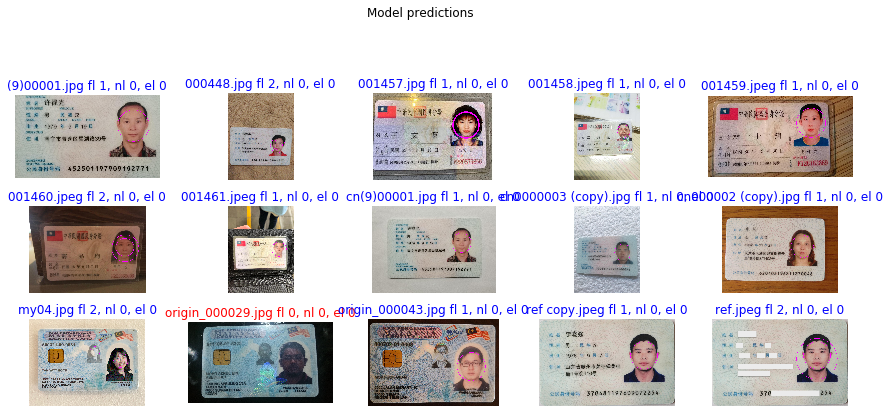

In [34]:
folder = 'correct'
lst = sorted(glob.glob("{}/{}/*".format(TEST_IMAGE_PATH,folder)))
plot_figure(lst)

2 0 0


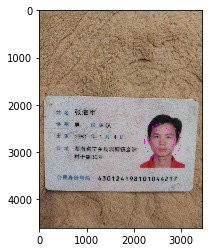

In [42]:
pic_path = os.path.join(TEST_IMAGE_PATH, 'correct/000448.jpg')
frame = plt.imread(pic_path)
frame, fl, nl, el = detectAndDisplay(frame)
print(fl, nl, el)
plt.imshow(frame)